In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math

In [2]:
df = pd.read_excel(r'C:\Users\ACER\Desktop\Programming\Projects\DigiLabs\MHA\Data\CLEAN DATA FOR PANDAS MANIPULATION.xlsx')

## Question:  What's the mean of age seniors that are still working and are not working?

Full  time = 0
Part time = 1
Unemployed / Looking for work = 2
Retired = 3
Homemaker = 4
Caregiver = 5
Freelance / Self-Employed / Contract = 6

In [3]:
df['Employment status'].value_counts() #checking distribution

0    106
3     79
1     47
4     39
2     18
6     12
5      3
Name: Employment status, dtype: int64

c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

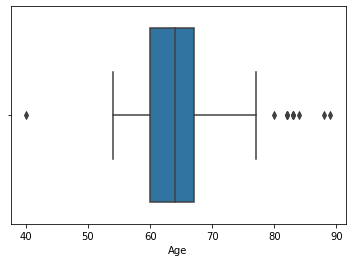

In [4]:
sns.boxplot(df['Age']) #checking presence of outliers

In [5]:
#identification of outliers through zscore
age_zscores = stats.zscore(df['Age'])
abs_age_zscores = np.abs(age_zscores)
filtered_entries = (abs_age_zscores < 3) 
data_without_outliers = df[filtered_entries] 

In [6]:
working_filter = df['Employment status'].isin([0,1,6])
not_working_filter = ~df['Employment status'].isin([0,1,6])

In [7]:
df.loc[working_filter, 'Age'].mean()

62.61212121212121

In [8]:
df.loc[not_working_filter, 'Age'].mean()

65.82014388489209

1. Seniors who have stopped working have a mean age of 65. Those that are currently working have a mean age of 62. 
2. Remaining working time for individuals after being legally classified as seniors is 5-7 years.


## What is the distribution of household income among those that are working and not working?

No income = 0
Below $1000 = 1
$1,000 - $3,999 = 2
$4,000 - $6,999 = 3
$7,000 - $9,999 = 4
$10,000 - $14,999 = 5
$15,000 & above = 6

In [9]:
#working
df.loc[working_filter,'Monthly household income from work (total amount of salary income by everyone in your household)'].value_counts()

2    52
3    36
5    23
4    22
6    20
1    12
Name: Monthly household income from work (total amount of salary income by everyone in your household), dtype: int64

In [10]:
#not working
df.loc[not_working_filter,'Monthly household income from work (total amount of salary income by everyone in your household)'].value_counts()

0    44
3    29
2    28
4    13
6    11
1     9
5     5
Name: Monthly household income from work (total amount of salary income by everyone in your household), dtype: int64

It is odd that there are seniors who answered 0 among those that are not working. It is either they did not understand that the question pertains to Monthly Household Income not Individual Income or they are stuck at a pitiful condition. It makes more sense for seniors who are not working to belong in high income households as the intuition there would be that they don't need to work anymore due to stable finances.

What is more surprising is that seniors who belong to households with income/high income are still willing to work despite of old age. Perhaps they have other motivations for working other than Money.

## What is the reasoning behind the Senior's employment status?

Strongly disagree = 0
Disagree = 1
Slightly disagree = 2
Slightly agree = 3
Agree = 4
Strongly Agree = 5

#### Zooming in on the "I am confident I have enough money to live the lifestyle I want / to provide for myself at this point." statement.

In [11]:
df.loc[working_filter, 'To what extent do you agree with this statement: I am confident I have enough money to live the lifestyle I want / to provide for myself at this point.'].value_counts()

4    64
3    52
5    21
2    14
1    14
Name: To what extent do you agree with this statement: I am confident I have enough money to live the lifestyle I want / to provide for myself at this point., dtype: int64

In [12]:
_= df.copy()
_.rename(columns={'To what extent do you agree with this statement: I am confident I have enough money to live the lifestyle I want / to provide for myself at this point.':'x',
                  'Monthly household income from work (total amount of salary income by everyone in your household)':'y'
},inplace=True)

<AxesSubplot:xlabel='x', ylabel='count'>

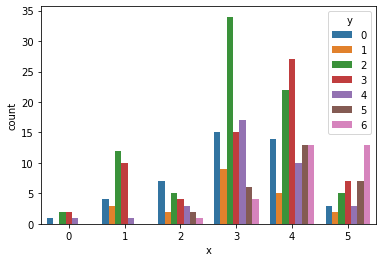

In [13]:
sns.countplot(data=_, x='x', hue='y')

In [14]:
df.loc[not_working_filter, 'To what extent do you agree with this statement: I am confident I have enough money to live the lifestyle I want / to provide for myself at this point.'].value_counts()

3    48
4    40
5    19
1    16
2    10
0     6
Name: To what extent do you agree with this statement: I am confident I have enough money to live the lifestyle I want / to provide for myself at this point., dtype: int64

A. Working - Majority of the seniors who are working are financially stable. 28 out of 165 seniors are working out of neccessity.

B. Not Working - Majority of the seniors who are not working are financially stable. 32 out of 165 seniors are impoverished. This is a mismatch with the previous analysis where 44 people indicated that they have no income.

#### Zooming in on Work Purpose Columns

  I am currently working to pass time purposefully.
  
  I am currently working because I have financial duties/responsibilities that I still need to fulfil.

  0 = no
  1 = yes

Working

In [15]:
df.loc[working_filter,'I am currently working because I have financial duties/responsibilities that I still need to fulfil.'].value_counts()

1    113
0     52
Name: I am currently working because I have financial duties/responsibilities that I still need to fulfil., dtype: int64

In [16]:
_ = df[working_filter]
_responsibility_filter = df.loc[working_filter,'I am currently working because I have financial duties/responsibilities that I still need to fulfil.'] ==1
_.loc[_responsibility_filter,'Monthly household income from work (total amount of salary income by everyone in your household)'].value_counts()

2    41
3    26
6    15
4    13
5    11
1     7
Name: Monthly household income from work (total amount of salary income by everyone in your household), dtype: int64

*Majority of those who are still working (113)feel that they have financial duties/responsibilities to fulfill despite Majority of them belonging in middle to high income households.*

*52 among those who are still working do not consider garnering income as their main motivation for work.*

In [17]:
df.loc[working_filter,'I am currently working to pass time purposefully.'].value_counts()

1    101
0     64
Name: I am currently working to pass time purposefully., dtype: int64

In [18]:
purpose_intersection_filter = (df['I am currently working because I have financial duties/responsibilities that I still need to fulfil.'] ==1) & (df['I am currently working to pass time purposefully.']==1)

In [19]:
df.loc[purpose_intersection_filter, 'Employment status'].value_counts().sum()

65

*Majority of the seniors who work do it to pass time purposefully. Majority of the seniors who work to fulfill financial duties also find working as a purposeful way to pass time. Singaporean seniors are workaholics.*

Not Working

In [20]:
df.loc[not_working_filter,'I am currently working because I have financial duties/responsibilities that I still need to fulfil.'].value_counts()

0    122
1     17
Name: I am currently working because I have financial duties/responsibilities that I still need to fulfil., dtype: int64

In [21]:
df.loc[not_working_filter,'I am currently working to pass time purposefully.'].value_counts()

0    116
1     23
Name: I am currently working to pass time purposefully., dtype: int64

In [22]:
#Zooming in on people classified as not working but answered 1
passtime_filter_1 = df.loc[not_working_filter,'I am currently working to pass time purposefully.']==1
_ = df[not_working_filter]
_.loc[passtime_filter_1,'Employment status'].value_counts()
#yep doesn't make any sense unless the person is a caregiver/homemaker as a living. (3 and 2 definitely doesn't make sense.)

3    10
4     6
2     6
5     1
Name: Employment status, dtype: int64

#### Strongly Correlated Work Columns

In [23]:
df['"Working gives me a sense of purpose that I cannot find anywhere else"'].value_counts()

4    104
3     66
5     40
1     39
6     25
2     22
0      8
Name: "Working gives me a sense of purpose that I cannot find anywhere else", dtype: int64

In [24]:
print(df['"I don\'t want to retire, I want to keep on working."'].value_counts().sum())
df['"I don\'t want to retire, I want to keep on working."'].value_counts()[[3,4,5]].sum()

304


187

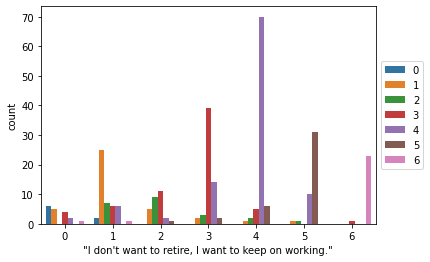

In [25]:
sns.countplot(data=df, 
              x='"I don\'t want to retire, I want to keep on working."', 
              hue='"Working gives me a sense of purpose that I cannot find anywhere else"')
plt.legend(bbox_to_anchor=(1,0.5) , loc='center left')

# Social Life

How many relatives (excluding spouse) do you see or hear from at least once a month?	
How many friends do you see or hear from at least once a month?	
How many colleagues do you see or hear from at least once a month?
How many neighbours do you see or hear from at least once a month?

How many friends do you feel close to such that you could call on them for help?	
How many relatives do you feel close to such that you could call on them for help?	
How many colleagues do you feel close to such that you could call on them for help?	
How many neighbours do you feel close to such that you could call on them for help?

### Frequency of meeting other people (MISTAKE)

In [26]:
frequency_of_meeting_people = (df['How many relatives (excluding spouse) do you see or hear from at least once a month?'] + \
                              df['How many friends do you see or hear from at least once a month?'] + \
                              df['How many colleagues do you see or hear from at least once a month?'] + \
                              df['How many neighbours do you see or hear from at least once a month?'])/4


In [27]:
#frequency_list = df['How many colleagues do you see or hear from at least once a month?']
frequency_list = pd.concat([df['How many friends do you see or hear from at least once a month?'],df['How many relatives (excluding spouse) do you see or hear from at least once a month?'],df['How many colleagues do you see or hear from at least once a month?'],df['How many neighbours do you see or hear from at least once a month?']])

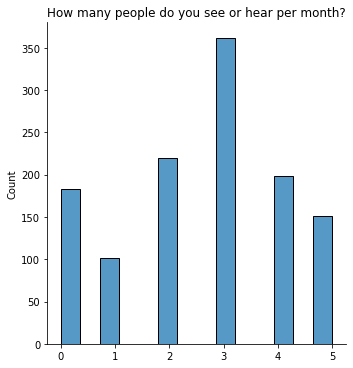

In [28]:

sns.displot(frequency_list).set(title='How many people do you see or hear per month?') #frequency of individual answers


Most seniors see or hear from 3-4  people across relatives, colleagues, and friends per month.

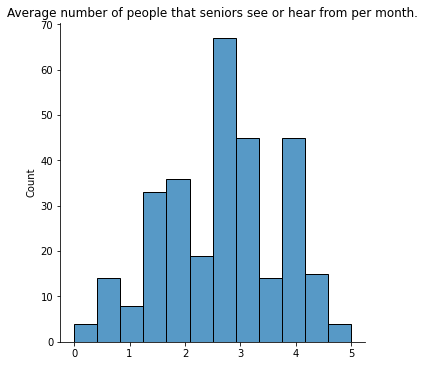

In [29]:

sns.displot(frequency_of_meeting_people).set(title='Average number of people that seniors see or hear from per month.') #degree of sociability

The average senior sees or hears from 9 familiar people per month.

### How many people could seniors rely on for help? (MISTAKE)

In [30]:
rely_list = pd.concat([df['How many friends do you feel close to such that you could call on them for help?'],
                      df['How many relatives do you feel close to such that you could call on them for help?'],
                      df['How many colleagues do you feel close to such that you could call on them for help?'],
                      df['How many neighbours do you feel close to such that you could call on them for help?']])

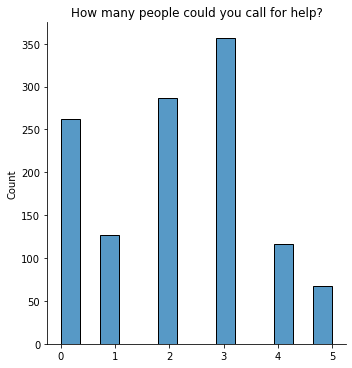

In [31]:
sns.displot(rely_list).set(title='How many people could you call for help?')

In [32]:
multiple_bar_df = pd.DataFrame({'See or Hear':frequency_list, 'Ask for help': rely_list})

In [33]:
multiple_bar_df_melted = pd.melt(multiple_bar_df, value_name="degree")

<AxesSubplot:xlabel='degree', ylabel='count'>

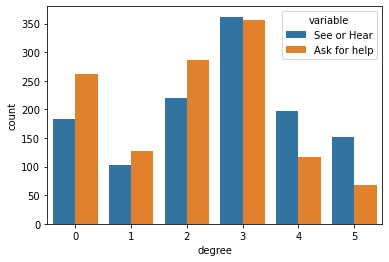

In [34]:
sns.countplot(data=multiple_bar_df_melted, x='degree', hue='variable')

### Frequency of Meeting other People

In [35]:
def decoder(values):
    if values == 1:
        return 1
    elif values == 2:
        return 2
    elif values == 3:
        return 3
    elif values == 4:
        return 5
    elif values ==5:
        return 9
    else:
        return 0

In [36]:
frequency_meet = (df['How many relatives (excluding spouse) do you see or hear from at least once a month?'].apply(decoder) + \
                              df['How many friends do you see or hear from at least once a month?'].apply(decoder)+ \
                              df['How many colleagues do you see or hear from at least once a month?'].apply(decoder) + \
                              df['How many neighbours do you see or hear from at least once a month?'].apply(decoder))/4


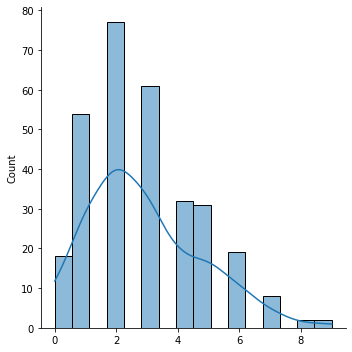

In [37]:
sns.displot(frequency_meet.apply(lambda x:int(x)),kde=True) #how many people they meet on average

In [38]:
actual_number_frequency = df['How many relatives (excluding spouse) do you see or hear from at least once a month?'].apply(decoder) +\
                          df['How many friends do you see or hear from at least once a month?'].apply(decoder) +\
                          df['How many colleagues do you see or hear from at least once a month?'].apply(decoder) +\
                          df['How many neighbours do you see or hear from at least once a month?'].apply(decoder) 

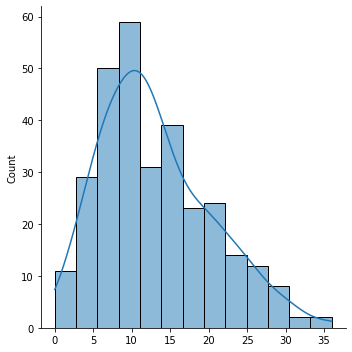

In [39]:
sns.displot(actual_number_frequency, kde=True)

### How many people could seniors rely on for help?

In [40]:
rely_list_upgraded = pd.concat([df['How many friends do you feel close to such that you could call on them for help?'].apply(decoder)+\
                      df['How many relatives do you feel close to such that you could call on them for help?'].apply(decoder)+\
                      df['How many colleagues do you feel close to such that you could call on them for help?'].apply(decoder)+\
                      df['How many neighbours do you feel close to such that you could call on them for help?'].apply(decoder)])/4

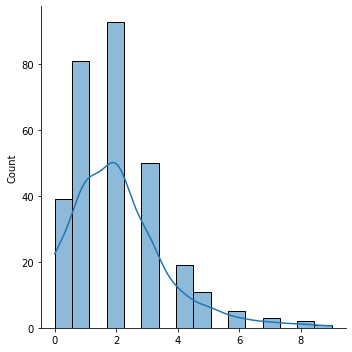

In [41]:
sns.displot(rely_list_upgraded.apply(lambda x: int(x)),kde=True)

In [42]:
rely_number = pd.concat([df['How many friends do you feel close to such that you could call on them for help?'].apply(decoder)+\
                      df['How many relatives do you feel close to such that you could call on them for help?'].apply(decoder)+\
                      df['How many colleagues do you feel close to such that you could call on them for help?'].apply(decoder)+\
                      df['How many neighbours do you feel close to such that you could call on them for help?'].apply(decoder)])

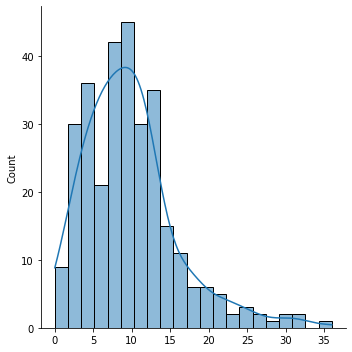

In [43]:
sns.displot(rely_number,kde=True)

<AxesSubplot:>

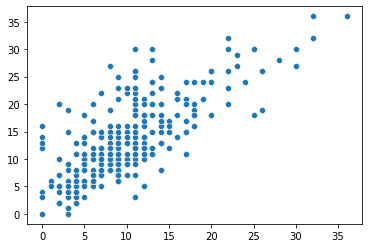

In [44]:
sns.scatterplot(x=rely_number,y=actual_number_frequency,cmap = "viridis", marker = "o")

### How often do seniors attend social activities/gatherings?

'How often do you attend religious services?'
'How often do you attend organised group meetings? (excluding work meetings)'
'How often do you socialise with friends and relatives?'
'How often do you socialise with neighbours?'	
'How often do you socialise with colleagues?'
'How often do you participate in volunteering activities?'

Daily = 0
Few times a week = 1
Weekly = 2 
Few times a month = 3
Monthly = 4
Few times half a year = 5
Few times a year = 6 
Never = 7


In [45]:
def decode_social(value):
    dick = {0:7, 1:6, 2:5, 3:4, 4:3, 5:2, 6:1, 7:0}
    return dick[value]

In [46]:
gathering_freq = pd.concat([df['How often do you attend religious services?'].apply(decode_social),
                                   df['How often do you attend organised group meetings? (excluding work meetings)'].apply(decode_social),
                                   df['How often do you socialise with friends and relatives?'].apply(decode_social),
                                   df['How often do you socialise with neighbours?'].apply(decode_social),
                                   df['How often do you socialise with colleagues?'].apply(decode_social),
                                   df['How often do you participate in volunteering activities?'].apply(decode_social)])

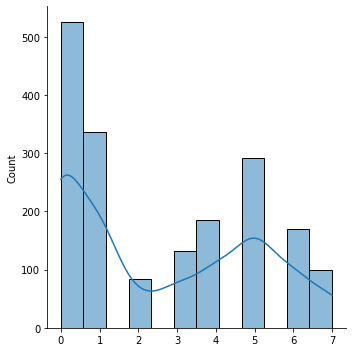

In [47]:
sns.displot(gathering_freq,kde=True)

In [48]:
gathering_freq_average = ((df['How often do you attend religious services?'].apply(decode_social) +\
                                   df['How often do you attend organised group meetings? (excluding work meetings)'].apply(decode_social) +\
                                   df['How often do you socialise with friends and relatives?'].apply(decode_social) +\
                                   df['How often do you socialise with neighbours?'].apply(decode_social) +\
                                   df['How often do you socialise with colleagues?'].apply(decode_social) +\
                                   df['How often do you participate in volunteering activities?'].apply(decode_social))/6).apply(lambda x:int(x))

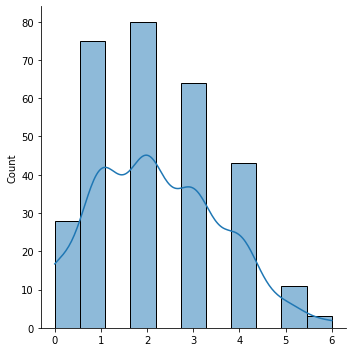

In [49]:
sns.displot(gathering_freq_average, kde=True)

### Do seniors care about being part of the community?

[Text(0, 0.5, '')]

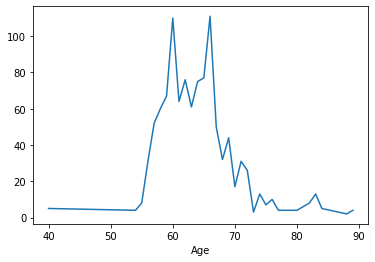

In [67]:
aging_part_of_community = df.groupby('Age')['It is important for me to be involved in the community.'].sum().reset_index()
sns.lineplot(data=aging_part_of_community, x='Age', y='It is important for me to be involved in the community.').set(ylabel=None)
#THIS OBSERVATION IS NOT VALID

[Text(0, 0.5, '')]

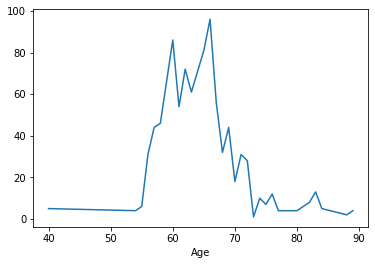

In [68]:
aging_satisfied_involvement = df.groupby('Age')['I am satisfied with my current level of involvement in the community.'].sum().reset_index()
sns.lineplot(data=aging_satisfied_involvement, x='Age', y='I am satisfied with my current level of involvement in the community.').set(ylabel=None)
#Not valid

'It is important for me to be involved in the community.'
'I am satisfied with my current level of involvement in the community.'


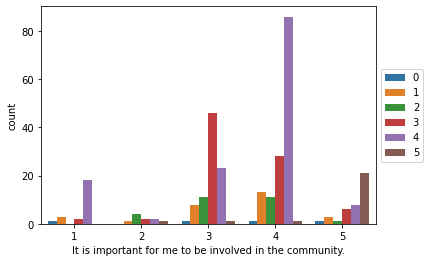

In [50]:
sns.countplot(data=df, 
              x='It is important for me to be involved in the community.',
              hue='I am satisfied with my current level of involvement in the community.')
plt.legend(bbox_to_anchor=(1,0.5) , loc='center left')

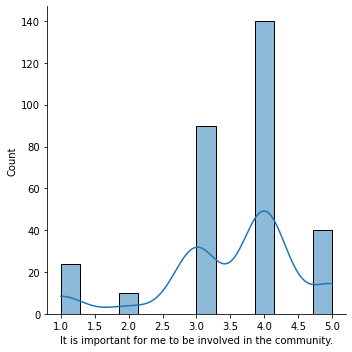

In [51]:
sns.displot(df['It is important for me to be involved in the community.'],kde=True)

In [52]:
filter_nocare = (df['It is important for me to be involved in the community.'] ==1) | (df['It is important for me to be involved in the community.'] ==2) | (df['It is important for me to be involved in the community.'] ==0)

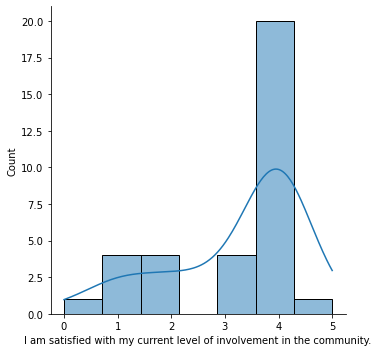

In [53]:
sns.displot(df.loc[filter_nocare,'I am satisfied with my current level of involvement in the community.'],kde=True)

# Activities

[Text(0, 0.5, '')]

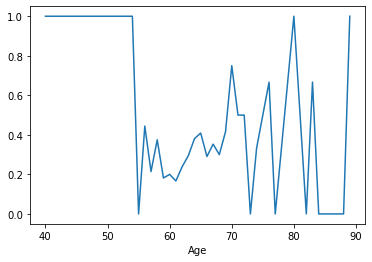

In [136]:
aging = df.groupby('Age')[
    'The following statements describe my current life stage: [I am regularly involved in activities with people in my community. (e.g. volunteering, leading and/or helping the community)]'
    ].mean().reset_index()
sns.lineplot(data=aging, x='Age', y='The following statements describe my current life stage: [I am regularly involved in activities with people in my community. (e.g. volunteering, leading and/or helping the community)]').set(ylabel=None)#invalid

## Do the seniors have a way to productively spend their time?


The following statements describe my current life stage: [I am regularly involved in activities with people in my community. (e.g. volunteering, leading and/or helping the community)]
The following statements describe my current life stage: [I have new-found priorities and responsibilities that I am regularly engaged in (e.g. established a fixed routine with a new hobby, or found a part-time job)]
The following statements describe my current life stage: [I am looking for suitable activities to fill my schedule. (e.g. finding new routines, trying out different activities in the neighbourhood)]


In [78]:
filter_looking = df['The following statements describe my current life stage: [I am looking for suitable activities to fill my schedule. (e.g. finding new routines, trying out different activities in the neighbourhood)]']==1
filter_found = df['The following statements describe my current life stage: [I have new-found priorities and responsibilities that I am regularly engaged in (e.g. established a fixed routine with a new hobby, or found a part-time job)]']==1
looking = df.loc[filter_looking,'The following statements describe my current life stage: [I am looking for suitable activities to fill my schedule. (e.g. finding new routines, trying out different activities in the neighbourhood)]'].count()
found = df.loc[filter_found,'The following statements describe my current life stage: [I have new-found priorities and responsibilities that I am regularly engaged in (e.g. established a fixed routine with a new hobby, or found a part-time job)]'].count()

In [93]:
activities = pd.DataFrame({'status':[looking,found], 'kind':['looking','found']})

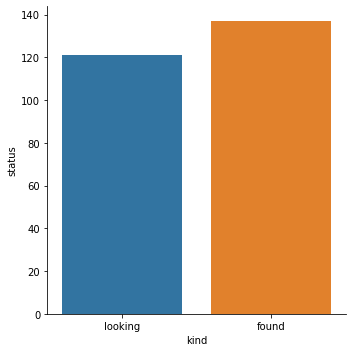

In [94]:
sns.catplot(data=activities, x='kind',y='status', kind='bar')

In [89]:
activities

,status
0,121
1,137


Zooming in the reason why some are still looking and don't know what to do.

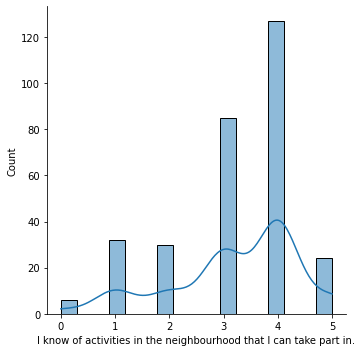

In [99]:
sns.displot(data=df['I know of activities in the neighbourhood that I can take part in.'],kde=True)

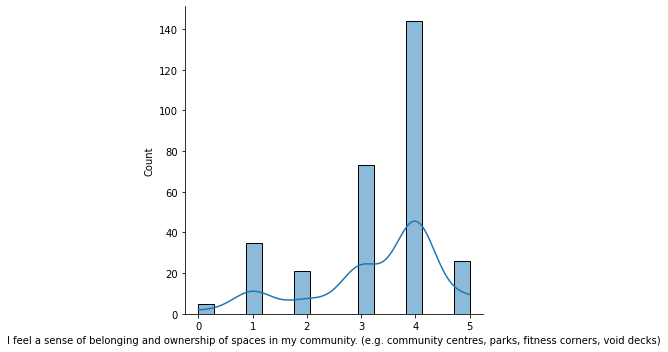

In [103]:
sns.displot(data=df['I feel a sense of belonging and ownership of spaces in my community. (e.g. community centres, parks, fitness corners, void decks)'],kde=True)

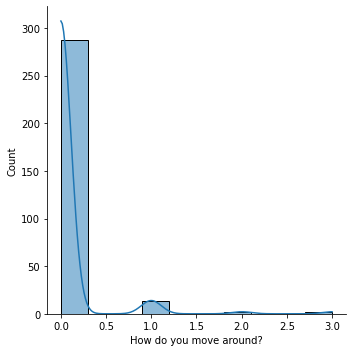

In [104]:
sns.displot(df['How do you move around?'],kde=True)

c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='I have a health condition or issue that affects my ability to be more active. (E.g. chronic illness or condition)', ylabel='count'>

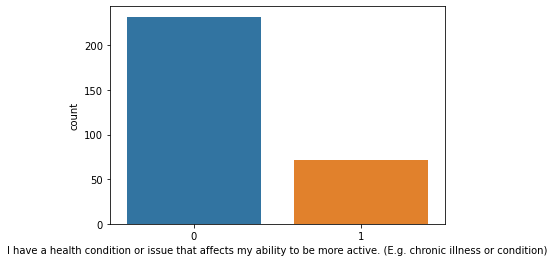

In [106]:
sns.countplot(df['I have a health condition or issue that affects my ability to be more active. (E.g. chronic illness or condition)'])

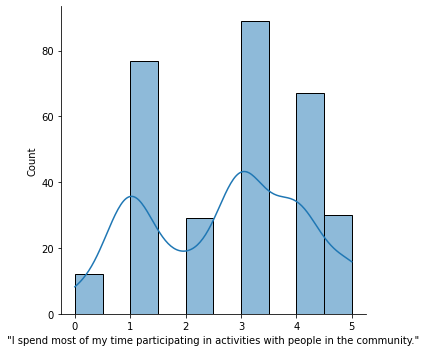

In [108]:
sns.displot(df['"I spend most of my time participating in activities with people in the community."'
],kde=True)

In [109]:
looking_data = df[filter_looking]

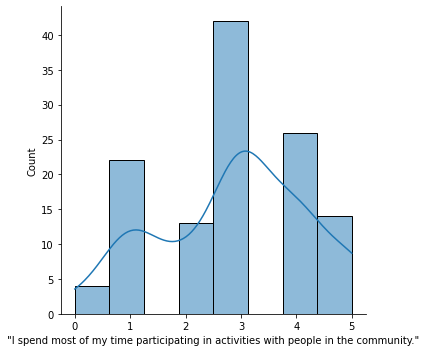

In [113]:
sns.displot(looking_data['"I spend most of my time participating in activities with people in the community."'],kde=True)

c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='I have mobility challenges that affects my ability to be more active.', ylabel='count'>

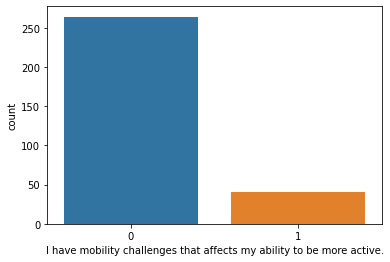

In [117]:

sns.countplot(df['I have mobility challenges that affects my ability to be more active.'])

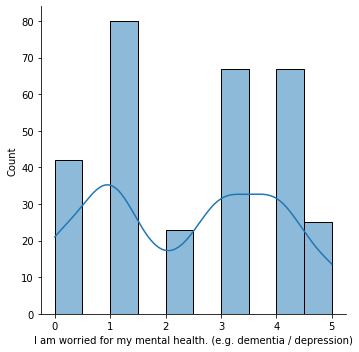

In [119]:
sns.displot(df['I am worried for my mental health. (e.g. dementia / depression)'],kde=True)

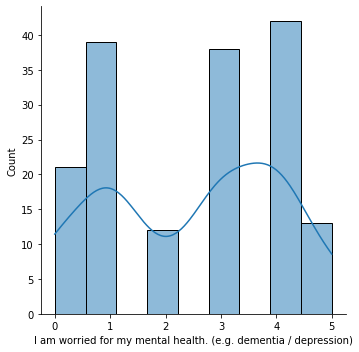

In [121]:
sns.displot(df.loc[working_filter,'I am worried for my mental health. (e.g. dementia / depression)'],kde=True)

1.      "I am carefree and prefer not to think so much. I just want to relax and live out my years."

2.      "I don't want to retire, I want to keep on working."

3.      "Working gives me a sense of purpose that I cannot find anywhere else"

4. "I pamper myself, live life to the fullest and do things I enjoy."



In [134]:
comparisons = pd.DataFrame({
    'sums':[df['"I am carefree and prefer not to think so much. I just want to relax and live out my years."'].sum(),
            df['"I don\'t want to retire, I want to keep on working."'].sum(),
            df['"Working gives me a sense of purpose that I cannot find anywhere else"'].sum(),
            df['"I pamper myself, live life to the fullest and do things I enjoy."'].sum()],'columns':['relax','grind','purpose','enjoy']})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


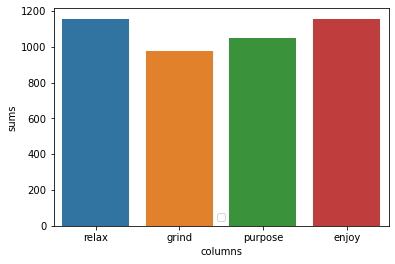

In [135]:
ax = sns.barplot(x=comparisons['columns'],y=comparisons['sums'])
ax.legend()

In [137]:
aspiration_comparisons = pd.DataFrame({
    'sums':[
        df['"I actively help others and involve myself in the community. I want to continue giving to society."'].sum(),
        df['I think it is important for me to keep growing in life.'].sum(),
        df['I am constantly challenging myself to achieve my goals.'].sum()],
    'columns':['Give to society', 'Keep growing', 'achieve goals']
    })

<AxesSubplot:xlabel='columns', ylabel='sums'>

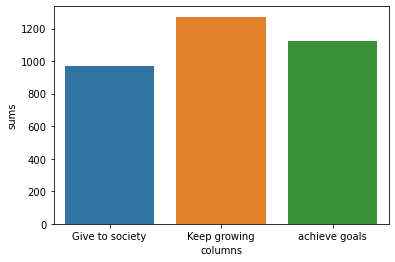

In [138]:
sns.barplot(data=aspiration_comparisons, x='columns', y='sums')

In [141]:
aspiration_comparisons

,sums,columns
0,972,Give to society
1,1273,Keep growing
2,1121,achieve goals


In [153]:
_= df[['Challenge myself','Learn new things','Contribute (e.g. teaching, e.t.c.)','Expand my social circle']].agg(sum).reset_index()

[Text(0, 0, 'Challenge'),
 Text(1, 0, 'Learn'),
 Text(2, 0, 'Contribute'),
 Text(3, 0, 'Expand Circle')]

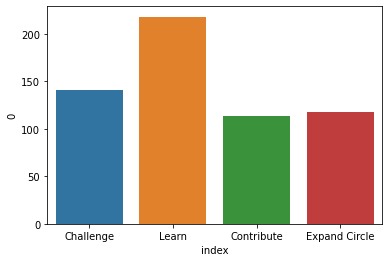

In [155]:
sns.barplot(data=_, x='index', y=0).set_xticklabels(['Challenge', 'Learn', 'Contribute','Expand Circle'])